# Programación Orientada a Objetos en `Python`

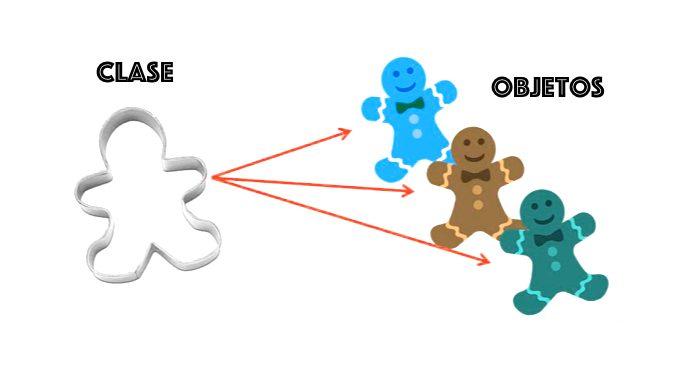

## Clases

**Clase.** Una clase es una plantilla para crear objetos. Las clases contienen la definición de los objetos con los que trabajamos y definen sus propiedades (**atributos**) además de especificar las modificaciones que se pueden hacer a esos objetos (**métodos**).

Cada vez que construimos un objeto de una clase, estamos creando una instancia de dicha clase.

**Objeto.** Es la instancia de una clase y consta de:

- **Estado.** Representado por los atributos del objeto, que reflejan sus propiedades
- **Comportamiento.** Representado por los métodos del objeto, que reflejan su resupuesta a otros objetos
- **Identidad.** Cada objeto tiene un nombre único que le permite interactuar con otros objetos

Las clases son fundamentales para lenguajes de programación orientada a objetos, como por ejemplo `Python`.

En definitiva, una clase es una plantilla y una instancia es una copia de la clase con valores determinados: un objeto.





### Mi primera clase en `Python`

Vamos a crear nuestra primera clase: la clase `Book`. Las clases se crean con la palabra reservada `class`.

De momento nuestra clase constará únicamente de una variable estática llamada `is_electronic`, que valdrá `False`, indicando así que todos los objetos de esta clase serán libros no electrónicos.

**Variable estática.** Son las variables que pertenecen a la clase.

In [ ]:
class Book():
  is_electronic = False

Ya hemos creado nuestra plantilla del objeto `Book`, que únicamente contiene si el libro en cuestión es electrónico o no.

Si ahora nosotros queremos crear un objeto de la clase `Book`, tendremos que instanciarlo del siguiente modo:

In [ ]:
book1 = Book()

Hemos construido un objeto de la clase `Book` con nuestra plantilla, por lo tanto `book1` se trata de un libro no electrónico.

Tal cual hacíamos anteriormente, si queremos saber a qué clase pertenece el objeto `book1`, le aplicamos la función `type()`

In [ ]:
type(book1)

__main__.Book

Si ahora queremos acceder a la única variable de la clase, `is_electronic`, entonces introducimos

In [ ]:
Book.is_electronic

False

y comprobamos así que efectivamente, el valor de la variable estática de `Book` es `False`.

Vamos a mejorar nuestra clase `Book` añadiendo docstrings

In [ ]:
class Book():
  """
  Clase para trabajar con libros
  """

  is_electronic = False

Ahora podemos acceder a ese docstring con el método `.__doc__`

In [ ]:
print(Book.__doc__)


  Clase para trabajar con libros
  


### El método constructor

Sigamos mejorando nuestra clase, esta vez modificando el método `.__init__()` que es llamado cuando inicializamos un objeto de la clase. Se trata del método constructor. Por parámetro puede recibir valores para los atributos de cada objeto:

**Atributo.** Son las variables que definen a los objetos de una clase. Son sus características.




In [ ]:
class Book():
  """
  Clase para trabajar con libros
  """

  def __init__(self, title, author, electronic):
    self.title = title
    self.author = author
    self.is_electronic = electronic

**Observación.** Hablaremos del parámetro `self` más adelante, cuando hablemos de métodos de instancia.

Ahora, si queremos crear un objeto de la clase `Book`, por como hemos construido el método `.__init__` tendremos que indicar el título y autor del libro

In [ ]:
book2 = Book("El señor de los Anillos", "J.R.R. Tolkien", False)

In [ ]:
book2.title

'El señor de los Anillos'

In [ ]:
book2.author

'J.R.R. Tolkien'

In [ ]:
book2.is_electronic

False

Para acceder a todos los atributos de un objeto y a los valores que tiene asignados, podemos usar el método `.__dict__`

In [ ]:
book2.__dict__

{'author': 'J.R.R. Tolkien',
 'is_electronic': False,
 'title': 'El señor de los Anillos'}

Si queremos evitar tener que introducir alguno de esos parámetros cada vez que inicialicemos un objeto de la clase `Book`, recordad que podemos poner valores por defecto a dichos parámetros

In [ ]:
class Book():
  """
  Clase para trabajar con libros
  """

  def __init__(self, title, author = "", electronic = False):
    self.title = title
    self.author = author
    self.is_electronic = electronic

In [ ]:
book3 = Book(title = "Las mil y una noches")

In [ ]:
book3.title

'Las mil y una noches'

In [ ]:
book3.is_electronic

False

Con lo cual, el único argumento obligatorio a introducir es el título. El resto son opcionales pues tienen valores por defecto.

### El método destructor

Así como existe un método constructor, existe un método destructor cuyo cometido consiste en eliminar instancias de una clase. Es decir, elimina un objeto.

El método destructor es el método `.__del__()`

In [ ]:
class Book():
  """
  Clase para trabajar con libros
  """

  def __init__(self, title, author = "", electronic = False):
    self.title = title
    self.author = author
    self.is_electronic = electronic

  def __del__(self):
    print("Acabas de llamar al método destructor. El objeto acaba de ser eliminado")

Para eliminar un objeto, utilizaos la palabra reservada `del`

In [ ]:
book = Book("Lazarillo de Tormes")
book.title

'Lazarillo de Tormes'

In [ ]:
del book

Acabas de llamar al método destructor. El objeto acaba de ser eliminado


Si intentásemos acceder al objeto `book`, obtendríamos error pues ha dejado de ser una instancia de la clase `Book` porque lo hemos eliminado.

## Métodos de una clase

Existen 3 tipos de métodos:

- Métodos de instancia
- Métodos estáticos
- Métodos de clase

### Métodos de instancia

Siempre toman el parámetro `self` como primer parámetro.

El parámetro `self` representa la instancia del método. Lo que hace `Python` es pasar el propio objeto como argumento del método.

In [ ]:
class Rectangle():

  def __init__(self, base = 1, height = 1, color = "blue"):
    self.base = base
    self.height = height
    self.color = color

  def perimeter(self):
    return 2 * self.base + 2 * self.height

  def area(self):
    return self.base * self.height

In [ ]:
rect1 = Rectangle(5, 2, "red")
print("El perímetro es {}".format(rect1.perimeter()))
print("El área es {}".format(rect1.area()))

El perímetro es 14
El área es 10


Si ahora modificamos la base, entonces tanto el perímetro como el área también cambiarán su valor:

In [ ]:
rect1.base = 3
print("Habiendo cambiado el valor de la base a 3, el perímetro es {}".format(rect1.perimeter()))
print("Habiendo cambiado el valor de la base a 3, el área es {}".format(rect1.area()))

Habiendo cambiado el valor de la base a 3, el perímetro es 10
Habiendo cambiado el valor de la base a 3, el área es 6


Los métodos de instancia pueden tener más inputs aparte del `self`. Añadamos un método que nos devuelva verdadero si la base es mayor a un valor mínimo al que llamaremos `min` y que por defecto haremos que valga 5:

In [ ]:
class Rectangle():

  def __init__(self, base = 1, height = 1, color = "blue"):
    self.base = base
    self.height = height
    self.color = color

  def perimeter(self):
    return 2 * self.base + 2 * self.height

  def area(self):
    return self.base * self.height

  def is_base_big(self, min = 5):
    if self.base > min:
      return True
    return False

In [ ]:
rect1 = Rectangle(3, 2, "red") # Como hemos modificado la clase, hay que volver a construir el objeto rect1
rect1.is_base_big()

False

In [ ]:
rect2 = Rectangle(12, 7)
rect2.is_base_big(10) # Hacemos que el valor mínimo aumente a 10

True

El método `.__str__` es un método de instancia. Es el método que debe ser llamado cuando el objeto se representa como un `string`. Es decir, lo que este método devuelve es lo que se muestra cuando hacemos un `print` del objeto en cuestión.

In [ ]:
class Rectangle():

  def __init__(self, base = 1, height = 1, color = "blue"):
    self.base = base
    self.height = height
    self.color = color

  def perimeter(self):
    return 2 * self.base + 2 * self.height

  def area(self):
    return self.base * self.height

  def is_base_big(self, min = 5):
    if self.base > min:
      return True
    return False

  def __str__(self):
    return ("Base: {}\nAltura: {}".format(self.base, self.height))

De modo que si ahora creamos un objeto de la clase `Rectangle` y pasamos por parámetro dicho objeto a la función `print()`, obtenemos lo siguiente

In [ ]:
rect3 = Rectangle(15, 9, "pink")
print(rect3)

Base: 15
Altura: 9


### Métodos estáticos

A diferencia de los métodos de instancia, los métodos estáticos no pasan como parámetro el argumento posicional `self`.

Los métodos estáticos se definen usando el decorador `@staticmethod`, que se añade antes de definir el método estático respectivo.

Los decoradores nos permiten alterar el comportamiento de las funciones o clases. Son utilizados para guardar utilidades relacionadas con la clase.

Vamos a crear un método que nos diga si dos rectángulos son iguales o no.

In [ ]:
class Rectangle():

  def __init__(self, base = 1, height = 1, color = "blue"):
    self.base = base
    self.height = height
    self.color = color

  def perimeter(self):
    return 2 * self.base + 2 * self.height

  def area(self):
    return self.base * self.height

  def is_base_big(self, min = 5):
    if self.base > 5:
      return True
    return False

  def __str__(self):
    return ("Base: {}\nAltura: {}".format(self.base, self.height))

  @staticmethod
  def are_equal_size(rect1, rect2):
    if rect1.base == rect2.base and rect1.height == rect2.height:
      return True
    return False

In [ ]:
rect1 = Rectangle(7, 5, "green")
rect2 = Rectangle(3 + 4, 7 - 2, "blue")
print(rect1, "\n")
print(rect2, "\n")
print(Rectangle.are_equal_size(rect1, rect2))

Base: 7
Altura: 5 

Base: 7
Altura: 5 

True


### Métodos de clase

La característica de estos métodos es que la clase entera es pasada como primer argumento, `cls`. Para los métodos de clase vuelve a usarse un deorador, `@classmethod`.

Vamos a crear un método que genere un rectángulo aleatoriamente. Para ello necesitamos importar la librería `random`

In [ ]:
import random

In [ ]:
class Rectangle():

  def __init__(self, base = 1, height = 1, color = "blue"):
    self.base = base
    self.height = height
    self.color = color

  def perimeter(self):
    return 2 * self.base + 2 * self.height

  def area(self):
    return self.base * self.height

  def is_base_big(self, min = 5):
    if self.base > min:
      return True
    return False

  def __str__(self):
    return ("Base: {}\nAltura: {}".format(self.base, self.height))

  @staticmethod
  def are_equal_size(rect1, rect2):
    if rect1.base == rect2.base and rect1.height == rect2.height:
      return True
    return False

  @classmethod
  def random_rectangle(cls):
    base = random.randrange(1, 10)
    height = random.randrange(1, 10)
    return cls(base, height)

In [ ]:
rect3 = Rectangle.random_rectangle()
print(rect3)

Base: 7
Altura: 5


## Propiedades

Para manejar los atributos de un objeto, podemos utilizar el decorador `@property` que permite a un método ser accedido como un atributo, omitiendo así el uso de paréntesis vacíos.

**Observación.** los paréntesis son vacíos cuando en un método no hay parámetros que indicar.

Los métodos `.perimeter()` y `.area()` son el ejemplo perfecto para ser modificados por el decorador `@property` pues siempre que son llamados, nunca toman valores por parámetro.

In [ ]:
class Rectangle():

  def __init__(self, base = 1, height = 1, color = "blue"):
    self.base = base
    self.height = height
    self.color = color

  @property
  def perimeter(self):
    return 2 * self.base + 2 * self.height

  @property
  def area(self):
    return self.base * self.height

  def is_base_big(self, min = 5):
    if self.base > min:
      return True
    return False

  def __str__(self):
    return ("Base: {}\nAltura: {}".format(self.base, self.height))

  @staticmethod
  def are_equal_size(rect1, rect2):
    if rect1.base == rect2.base and rect1.height == rect2.height:
      return True
    return False

  @classmethod
  def random_rectangle(cls):
    base = random.randrange(1, 10)
    height = random.randrange(1, 10)
    return cls(base, height)

In [ ]:
rect4 = Rectangle(2, 3, "yellow")

In [ ]:
rect4.perimeter

10

In [ ]:
rect4.area

6

**¡Cuidado!** El modificador únicamente nos permite acceder al método como si fuera un atributo, pero eso no significa que pueda ser tratado como tal. Si intentamos modificarlo como si fuera un atributo, nos saltará error

In [ ]:
rect4.perimeter = 12

Para poder modificar una propiedad, necesitamos utilizar el método `.setter()`.

Veámoslo con un ejemplo:



In [ ]:
class Person():

  def __init__(self, name, surname):
    self.name = name
    self.surname = surname

  @property
  def complete_name(self):
    return "{} {}".format(self.name, self.surname)

  @complete_name.setter
  def complete_name(self, name_surname):
    name, surname = name_surname.split(" ")
    self.name = name
    self.surname = surname


La clase `Person` toma como parámetros nombre y apellido de una persona. Tiene una propiedad que devuelve el nombre completo de dicha persona.

Gracias al método `.setter()` somos capaces de modificar dicha propiedad. Lo hemos conseguido usando un decorador con el nombre de la propiedad seguido de `.setter`.

Para modificar el nombre completo, debemos introducir este por parámetro.


In [ ]:
person1 = Person("María", "Gomila")
person1.complete_name

'María Gomila'

In [ ]:
person1.complete_name = "María Santos"
person1.surname

'Santos'

Otro uso muy común del métood `.setter()` es prevenir al usuario de introducir valores que no deberían estar permitidos.

Por ejemplo, un círculo no puede tener un diámetro que valga 0 o menos:

In [ ]:
class Circle():

  def __init__(self, center = (0, 0), radius = 1):
    self.center = center
    self.radius = radius

  @property
  def diameter(self):
    return 2 * self.radius

  @diameter.setter
  def diameter(self, value):
    if value <= 0:
      raise ValueError("El diámetro no puede valer menor o igual a 0")
    self.radius = value / 2


Si probamos ahora de modificar el diámetro para que valga un valor 0 o negativo, entonces nos saltará el `ValueError` que hemos configurado previamente.

In [ ]:
circle1 = Circle(radius = 2)
circle1.diameter = -2

ValueError: ignored

## Clase `inheritance`

Esta clase permite a los atributos y métodos ser pasados de una clase a otra. Es útil cuando ya existe una clase que hace todo lo que necesitamos, a la cuál querríamos añadir algún atributo o método extra.

Supongamos que queremos crear dos clases: una representando niños (personas menores de edad) y otra representando adultos.

La clase `Children` sería:


In [ ]:
class Children():

  is_adult = False

  def __init__(self, name, surname, age):
    self.name = name
    self.surname = surname
    self.age = age

  @property
  def complete_name(self):
    return "{} {}".format(self.name, self.surname)

  @complete_name.setter
  def complete_name(self, name_surname):
    name, surname = name_surname.split(" ")
    self.name = name
    self.surname = surname

Y la clase `Adult`,

In [ ]:
class Adult():

  is_adult = True

  def __init__(self, name, surname, age):
    self.name = name
    self.surname = surname
    self.age = age

  @property
  def complete_name(self):
    return "{} {}".format(self.name, self.surname)

  @complete_name.setter
  def complete_name(self, name_surname):
    name, surname = name_surname.split(" ")
    self.name = name
    self.surname = surname

Estamos repitiendo mucho código. Para ser exactos, la única diferencia entre ambas clases es el atributo `.is_adult`, que en `Children` vale `False` y en `Adult` vale `True`.

### Single Inheritance

Implica crear clases hijo que heredan atributos y métodos de una sola clase padre. Tomando las dos clases anteriores, `Children` y `Adult`, tenemos la clase `Person` que representa las partes comunes de las clases `Children` y `Adult`.

In [ ]:
class Person(object):

  def __init__(self, name, surname, age):
    self.name = name
    self.surname = surname
    self.age = age

  @property
  def complete_name(self):
    return "{} {}".format(self.name, self.surname)

  @complete_name.setter
  def complete_name(self, name_surname):
    name, surname = name_surname.split(" ")
    self.name = name
    self.surname = surname

De modo que ahora las clases `Children` y `Adult` pueden ser creadas como hijos de la clase padre `Person`

In [ ]:
class Children(Person):
  is_adult = False

In [ ]:
class Adult(Person):
  is_adult = True

In [ ]:
child = Children("Juan", "Sánchez", 6)
child.name

'Juan'

De este modo, la lógica del `.__init__()` solo se especifica una vez, haciendo mucho más sencillo el modificarlo en un futuro desde la clase padre. Del mismo modo, también será más sencillo crear subclases diferentes de la clase `Person`. Además, también es posible crear subclases de la ya subclase `Children`, como por ejemplo `Teenager` dependiendo del rango de edad dentro del intervalo [0, 18).

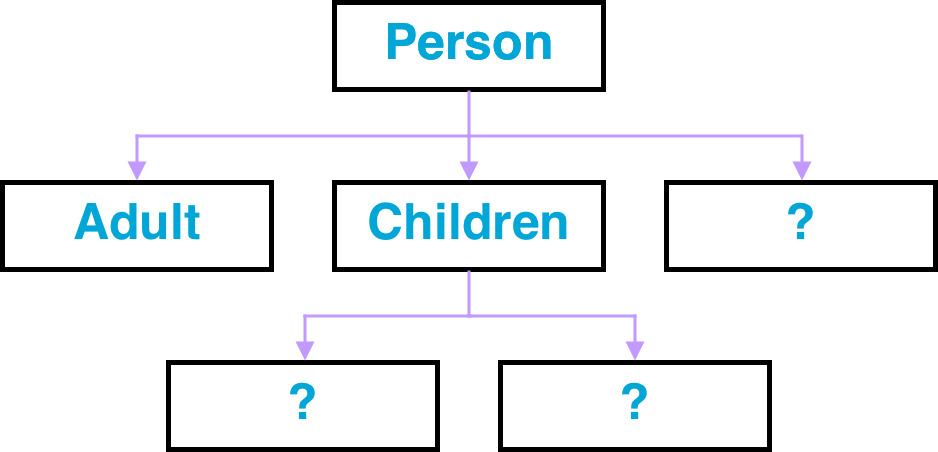

Así como hemos heredado de la clase que hemos creado, `Person`, podemos heredar de una clase ya existente en `Python`, como por ejemplo la clase `int`

In [ ]:
class MyInt(int):
  def is_divisible_by(self, divisor):
    return self % divisor == 0

In [ ]:
n = MyInt(27)
n.is_divisible_by(9)

True

#### Sobreescribiendo métodos

Con la herencia de clases, no solo podemos extender el comportamiento de clases más generales, sino que también podemos modificar algunos atributos o métodos heredados de la clase padre.

Supongamos que tenemos la clase `Person()`

In [ ]:
class Person(object):

  def __init__(self, name, surname, age):
    self.name = name
    self.surname = surname
    self.age = age

  @property
  def complete_name(self):
    return "{} {}".format(self.name, self.surname)

  @complete_name.setter
  def complete_name(self, name_surname):
    name, surname = name_surname.split(" ")
    self.name = name
    self.surname = surname

Pero que a la hora de introducir el nombre completo, tenemos problemas pues la persona tiene segundo nombre. Entonces podríamos crear una clase `SecondNamePerson` que tomase en consideración estos aspectos con respecto al nombre completo.

In [ ]:
class SecondNamePerson(Person):
  @property
  def complete_name(self):
    return "{} {}".format(self.name, self.surname)

  @complete_name.setter
  def complete_name(self, names_surname):
    names = names_surname.split(" ")
    self.surname = names[-1]
    if len(names) > 2:
      self.name = " ".join(names[:(len(names)-1)])
    elif len(names) == 2:
      self.name = names[0]

In [ ]:
person2 = SecondNamePerson("Juan", "Gomila", 32)
person2.complete_name = "Juan Gabriel Gomila"
print(person2.name)
print(person2.surname)

Juan Gabriel
Gomila


#### El método `.super()`

El método `.super()` nos sirve para acceder a un método de la clase padre.

In [ ]:
class Person(object):

  def __init__(self, name, surname, age):
    self.name = name
    self.surname = surname
    self.age = age

  @property
  def complete_name(self):
    return "{} {}".format(self.name, self.surname)

  @complete_name.setter
  def complete_name(self, name_surname):
    name, surname = name_surname.split(" ")
    self.name = name
    self.surname = surname

  @property
  def introduction(self):
    print("Hola, mi nombre es {}".format(self.complete_name))

Supongamos que queremos crear una subclase para que una persona diga muchas más cosas a la hora de presentarse:

In [ ]:
class TalkativePerson(Person):

    @property
    def introduction(self):
        print("Hola, mi nombre es {}".format(self.complete_name))
        print("Un placer conocerte!")

In [ ]:
person3 = TalkativePerson("Paula", "Olivera", 16)
person3.introduction

Hola, mi nombre es Paula Olivera
Un placer conocerte!


Lo hecho anteriormente es correcto, aunque estamos copiando la primera frase tal cual está en la clase `Person`. Para evitar dicha copia, lo que podemos hacer es utilizar el método `.super()`

In [ ]:
class TalkativePerson(Person):

    @property
    def introduction(self):
        super().introduction
        print("Un placer conocerte!")

In [ ]:
person4 = TalkativePerson("Marta", "Fernández", 16)
person4.introduction

Hola, mi nombre es Marta Fernández
Un placer conocerte!


### Multiple Inheritance

Implica crear clases hijo que heredan atributos y métodos de múltiples clases padre.

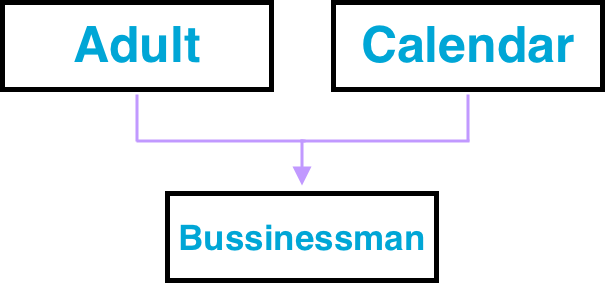


En este caso, además de la clase `Adult`, que hereda de la clase `Person`, vamos a tener la clase `Calendar`.

In [ ]:
class Person(object):

  def __init__(self, name, surname, age):
    self.name = name
    self.surname = surname
    self.age = age

  @property
  def complete_name(self):
    return "{} {}".format(self.name, self.surname)

  @complete_name.setter
  def complete_name(self, name_surname):
    name, surname = name_surname.split(" ")
    self.name = name
    self.surname = surname

  @property
  def introduction(self):
    print("Hola, mi nombre es {}".format(self.complete_name))

class Adult(Person):
  is_adult = True

In [ ]:
class Calendar(object):

  @staticmethod
  def new_event(title, day, hour, duration = "All day"):
    print("Reservado el día {} a las {} durante {} para {}".format(day, hour, duration, title))

Por último, vamos a crear una subclase que herede tanto de `Adult` como de `Calendar`, a la que llamaremos `Bussinessman` que no tendrá ningún método ni argumento adicional. Por tanto, tendremos que hacer uso de la instrucción `pass`

In [ ]:
class Bussinessman(Adult, Calendar):
  pass

In [ ]:
bussinessman = Bussinessman("Manuel", "Gómez", 38)
bussinessman.introduction
Bussinessman.new_event("Reunión", "30 de Septiembre", "16:30", "2 horas")

Hola, mi nombre es Manuel Gómez
Reservado el día 30 de Septiembre a las 16:30 durante 2 horas para Reunión


#### El método `.super()`

Ahora que heredamos de más de una clase padre ¿qué ocurre cuando usamos el método `.super()`?

Si ninguna de las clases padres tiene algún método con el mismo nombre, entonces no hay ningún problema. No obstante, si nos encontramos en el caso contrario, donde hay uno o más métodos con el mismo nombre en ambas clases, entonces el método que va a ser usado al llamarlo con el método `.super()` es el perteneciente a la primera clase padre de la cual se hereda.

Veámoslo con un ejemplo: tenemos la clase `ClassAB` que heredará de las clases `ClassA` y `ClassB`

In [ ]:
class ClassA():

  def say_letter(self):
    print("Mi letrita es la A")


class ClassB():

  def say_letter(self):
    print("Mi letrita es la B")

In [ ]:
class ClassAB(ClassA, ClassB):

  def my_letter(self):
    print("A pesar de que heredo las letras A y B (así lo indica mi nombre)")
    super().say_letter()


In [ ]:
ab = ClassAB()
ab.my_letter()

A pesar de que heredo las letras A y B (así lo indica mi nombre)
Mi letrita es la A


In [ ]:
class ClassAB(ClassB, ClassA):

  def my_letter(self):
    print("A pesar de que heredo las letras A y B (así lo indica mi nombre)")
    super().say_letter()

In [ ]:
ab = ClassAB()
ab.my_letter()

A pesar de que heredo las letras A y B (así lo indica mi nombre)
Mi letrita es la B


**Observación.** Esto no solo ocurre cuando usamos el método `.super()`, sino también cuando queremos acceder a un método cuyo nombre está presente en más de una clase padre.

In [ ]:
class ClassAB(ClassA, ClassB):
  pass

In [ ]:
ab = ClassAB()
ab.say_letter()

Mi letrita es la A


In [ ]:
class ClassAB(ClassB, ClassA):
  pass

In [ ]:
ab = ClassAB()
ab.say_letter()

Mi letrita es la B


## Polimorfismo

**Polimorfismo.** Significa que una función con el mismo nombre se utiliza para diferentes tipos de objeto.

Un ejemplo perfecto es la función `len()` que sirve tanto para objetos de tipo `string` como listas.

In [ ]:
print(len("matematicas")) # Aplicada a string
print(len([1, 2, 3])) # Aplicada a lista

11
3


En la programación orientada a objetos también nos encontramos con funciones que tienen el mismo nombre, pero pueden ser aplicadas a diferentes objetos.

In [ ]:
class Spain():
    def capital(self):
        print("Madrid es la capital de España")

    def language(self):
        print("En España se habla el español")


class Portugal():
    def capital(self):
        print("Lisboa es la capital de Portugal.")

    def language(self):
        print("En Portugal se habla el portugués")


spain = Spain()
portugal = Portugal()
for country in (spain, portugal):
    country.capital()
    country.language()
    print("")

Madrid es la capital de España
En España se habla el español

Lisboa es la capital de Portugal.
En Portugal se habla el portugués



Incluso cuando hablamos de herencia, también podemos encontrarnos con polimorfismos tal y como vimos por ejemplo con las clases `Person` y `SecondNamePerson`, donde ambas compartían el método `.complete_name()`

In [ ]:
class Person():

  def __init__(self, name, surname, age):
    self.name = name
    self.surname = surname
    self.age = age

  @property
  def complete_name(self):
    return "{} {}".format(self.name, self.surname)

  @complete_name.setter
  def complete_name(self, name_surname):
    name, surname = name_surname.split(" ")
    self.name = name
    self.surname = surname

In [ ]:
class SecondNamePerson(Person):
  @property
  def complete_name(self):
    return "{} {}".format(self.name, self.surname)

  @complete_name.setter
  def complete_name(self, names_surname):
    names = names_surname.split(" ")
    self.surname = names[-1]
    if len(names) > 2:
      self.name = " ".join(names[:(len(names)-1)])
    elif len(names) == 2:
      self.name = names[0]

In [ ]:
person2 = SecondNamePerson("Juan", "Gomila", 32)
person2.complete_name = "Juan Gabriel Gomila"
print(person2.name)
print(person2.surname)

Juan Gabriel
Gomila
